In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [65]:
df['yearMonth'] =  "01-"+df['month'].astype(str) +"-"+ df['year'].astype(str)
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [66]:
df['yearMonth'] = pd.to_datetime(df['yearMonth'])
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [68]:
df.set_index('yearMonth', inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


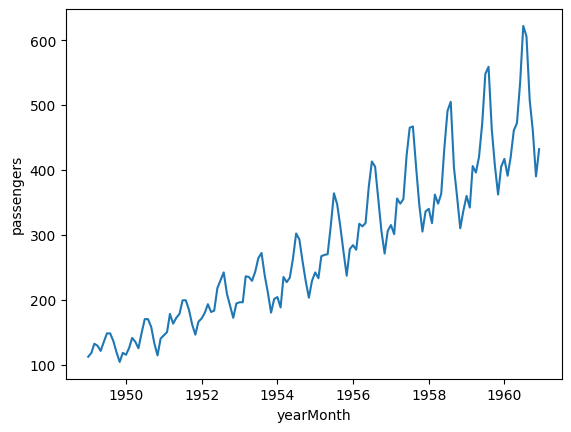

In [69]:
plt.figure()
sns.lineplot(data=df, x=df.index, y=df.passengers)
plt.show()

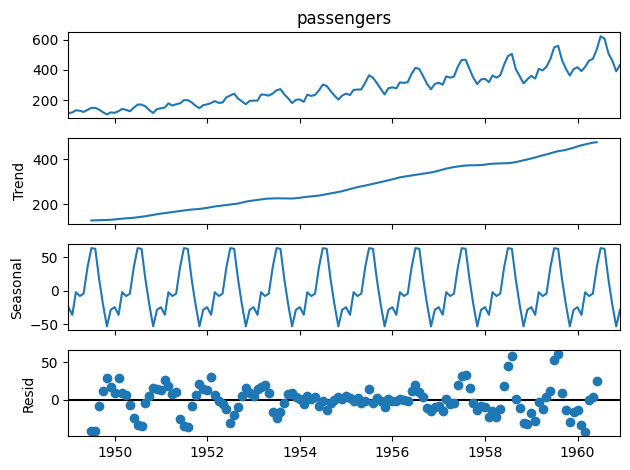

In [70]:
#check further for seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
decmoposition = seasonal_decompose(df['passengers'], period=12)
fig = decmoposition.plot()
plt.show()

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollStd, Length: 144, dtype: float64


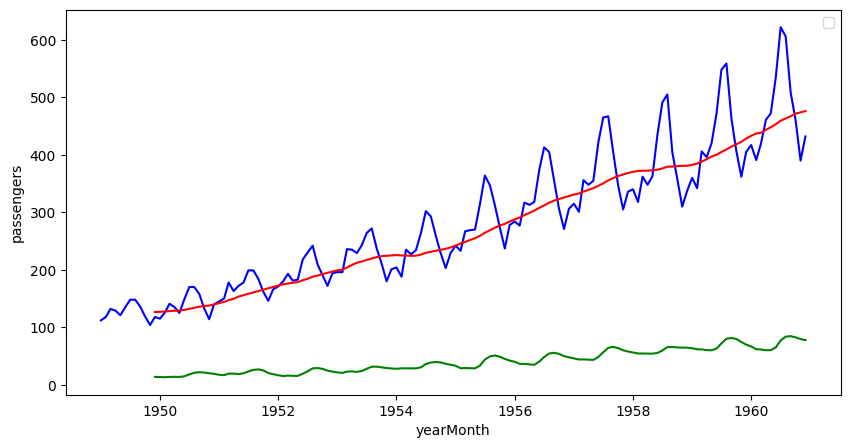

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


In [83]:
#@title{vertical-output: true}
#Calculate and plot rolling mean and standard deviation for 12 months
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

print (df['rollMean'])
print (df['rollStd'])

plt.figure(figsize=(10,5))

sns.lineplot(data=df,x=df.index,y=df.passengers,  color='blue')
sns.lineplot(data=df,x=df.index,y=df.rollMean,  color='red')
sns.lineplot(data=df,x=df.index,y=df.rollStd,  color='green')
plt.legend()
plt.show()

# Conclusion: Mean is not stationary, SD is stationary; so our data is not stationary

#Now let us perform the ADF test

from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df['passengers'])
print(adfTest) # Let us interpret these values below by converting into a series
stats = pd.Series (adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
print(stats)



#Ho: Time series is not staionary
#p-value >= 0.05: Do not reject the Null Hypothesis
#ADF statistic is less negative (or more positive) than the critical value
#Do not reject the null hypothesis, meaning the series is non-staionary

for key, value in adfTest[4].items():
    print('Criticality', key, ':', value)

#We will see that Test staistic > Critical value in all the cases, so we do not reject the null hypothesis.
#It means that our data is not staionary.


Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


In [89]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).mean()
    print(dataFrame.iloc[12:])
    from statsmodels.tsa.stattools import adfuller

    adfTest = adfuller(dataFrame[var])
    print(adfTest)

    stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-vale', '#lags used', 'number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
        print("criticality", key, ":", values)

    plt.figure(figsize=(8,6))
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='blue', y = var)
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='red', y = 'rollMean')
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='green', y = 'rollStd')
    plt.show()

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0
            passengers  shift  shiftDiff  rollMean   rollStd
yearMonth                            

<ipython-input-89-cf59cfce6187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-89-cf59cfce6187>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).mean()


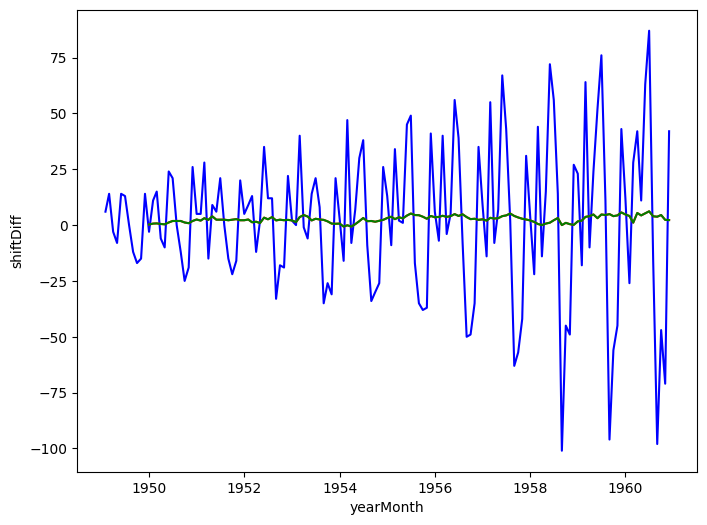

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132  112.0       20.0
1949-04-01         129  118.0       11.0
1949-05-01         121  132.0      -11.0
1949-06-01         135  129.0        6.0
1949-07-01         148  121.0       27.0
1949-08-01         148  135.0       13.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  148.0      -29.0
1949-11-01         104  136.0      -32.0
1949-12-01         118  119.0       -1.0
1950-01-01         115  104.0       11.0
1950-02-01         126  118.0        8.0
1950-03-01         141  115.0       26.0
1950-04-01         135  126.0        9.0
1950-05-01         125  141.0      -16.0
1950-06-01         149  135.0       14.0
1950-07-01         170  125.0       45.0
1950-08-01         170  149.0       21.0


In [90]:
#@title{vertical-output: true}
# Just get the passengers column into a new dataframe for easier testing

air_df = df[['passengers']].copy() # Double brackets because it is a list within a list print(air_df.head())

#By default, shift is by 1 time period (here, one month)
#Create a new column which will contain the shifted value from passengers column See slide

air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))

#Test stationarity
test_stationarity(air_df.dropna(), 'shiftDiff')

#p-value is just close to 0.05, so let us try a shift of 2
#By default, shift is by 1 time period (here, one month)
#Create a new column which will contain the shifted value from passengers column See slide

air_df['shift'] = air_df.passengers.shift(2)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']

print(air_df.head(20))

(-2.961695135555418, 0.03862975767698902, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 985.7309222414162)
Test Statistic                  -2.961695
p-vale                           0.038630
#lags used                      11.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


<ipython-input-73-e36e7f5705e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-73-e36e7f5705e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).mean()


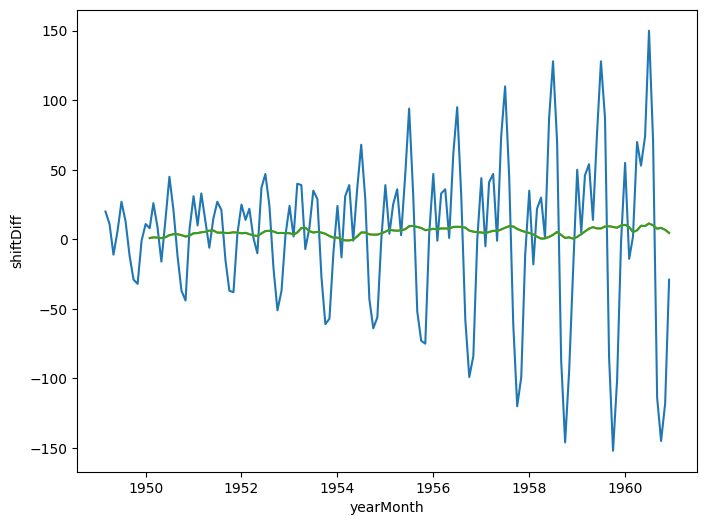

In [75]:
# Test staionary
test_stationarity(air_df.dropna(), 'shiftDiff')
# p-value = 0.03, which is < 0.05, so
#Conclusion: The data has become somewhat staionary

            passengers  firstDiff  Diff12
yearMonth                                
1949-01-01         112        NaN     NaN
1949-02-01         118        6.0     NaN
1949-03-01         132       14.0     NaN
1949-04-01         129       -3.0     NaN
1949-05-01         121       -8.0     NaN


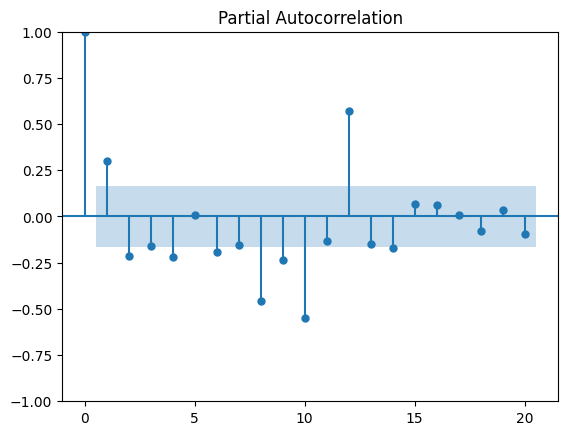

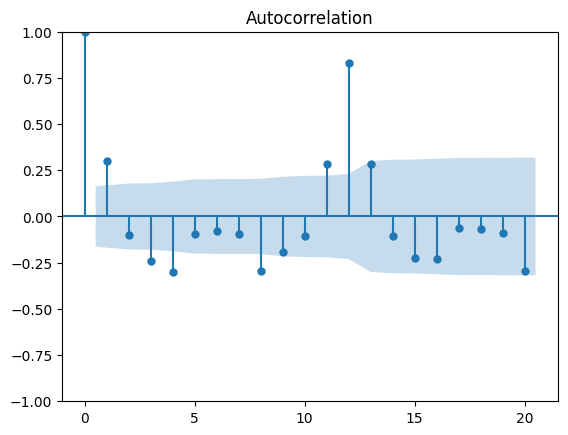

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  firstDiff  Diff12   arimaPred
yearMonth                                            
1960-08-01         606      -16.0    47.0  451.951771
1960-09-01         508      -98.0    45.0  454.405119
1960-10-01         461      -47.0    54.0  456.858466
1960-11-01         390      -71.0    28.0  459.311813
1960-12-01         432       42.0    27.0  461.765161


In [76]:
# Now ARIMA: In google colab, you may need Ipip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

airp = df[['passengers']].copy(deep=True)
airp['firstDiff'] = airp['passengers'].diff()
airp['Diff12'] = airp['passengers'].diff(12) #This will be used later in SARIMAX

print(airp.head())
plot_pacf(airp['firstDiff'].dropna(),lags=20)
plt.show()

plot_acf(airp['firstDiff'].dropna(),lags=20)
plt.show()

#Build ARIMA model

train = airp[:round (len(airp) *70/100)] # Take the first 70% data print(train.tail()) # Just to check where it ends
test = airp[round (len(airp) *70/100):] # Take the last 30% data, starting from 71% print(test.head()) # Just to check where it starts
model = ARIMA(train ['passengers'], order=(1,2,1)) # Parameters: p, d, q

model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
airp['arimaPred'] = prediction
print(airp.tail())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  sarimaxPred
yearMonth                          
1960-08-01         606   588.758402
1960-09-01         508   518.373283
1960-10-01         461   452.599911
1960-11-01         390   402.819856
1960-12-01         432   450.798742
            passengers  firstDiff  Diff12  arimaPred
yearMonth                                           
1949-01-01         112        NaN     NaN        NaN
1949-02-01         118        6.0     NaN        NaN
1949-03-01         132       14.0     NaN        NaN
1949-04-01         129       -3.0     NaN        NaN
1949-05-01         121       -8.0     NaN        NaN


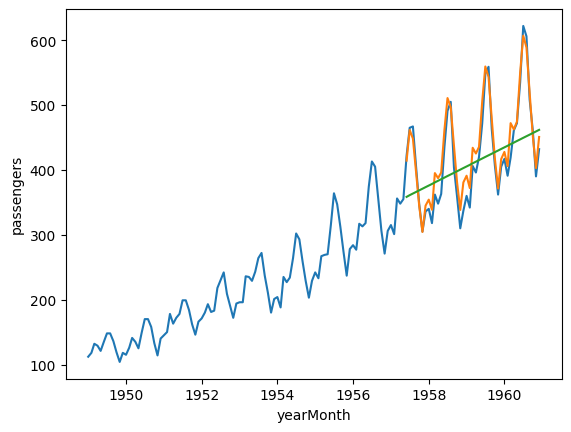

            passengers  sarimaxPred
yearMonth                          
1960-08-01         606   588.758402
1960-09-01         508   518.373283
1960-10-01         461   452.599911
1960-11-01         390   402.819856
1960-12-01         432   450.798742
Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]
1961-01-01    462.563573
1961-02-01    437.555363
1961-03-01    508.352611
1961-04-01    497.732521
1961-05-01    511.036271
1961-06-01    591.675727
1961-07-01    652.336460
1961-08-01    632.027917
1961-09-01    555.850393
1961-10-01    485.353032
1961-11-01    431.999448
1961-12-01    482.564147
1962-01-01    494.964980
1962-02-01    466.806870
1962-03-01    541.955180
1962-04-01    530.329401
1962-05-01    545.055419
1962-06-01    630.738629
1962-07-01    694.851309
1962-08-01    672.399901
1962-09-01    590.330110
1962-10-01    515.019227
1962-11-01    458.043286
1962-12-01    511.096259
Freq: M

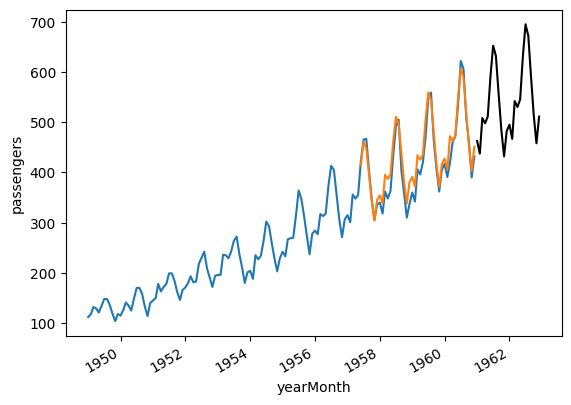

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Now SARIMAX prediction
airP = df[['passengers']].copy(deep=True)
model = SARIMAX(train ['passengers'], order=(1,2,1), seasonal_order=(1,2,1,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction
print(airP.tail())

#Data looks better

# Plot

airp.dropna()
print(airp.head())
sns.lineplot(data=airP,x=airp.index,y='passengers')
sns.lineplot(data=airP, x=airp.index,y='sarimaxPred')
sns.lineplot(data=airp, x=airP.index,y='arimaPred')

plt.show()

# Compared to ARIMA, SARIMAX is much better
# Future prediction: first check the last date in our dataset
print(airP.tail())

#MS: Month Start frequency
#Creae a datea frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
print(futureDate.head())

# Predict and print
print(model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]))

# Plot
airp.dropna()
sns.lineplot(data=airP, x=airp.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot(color='black')
plt.show()